In [7]:
import networkx as nx
from collections import defaultdict

# Eigenvector Centrality Score Counterexample

In [8]:
import scipy as sp
import numpy as np

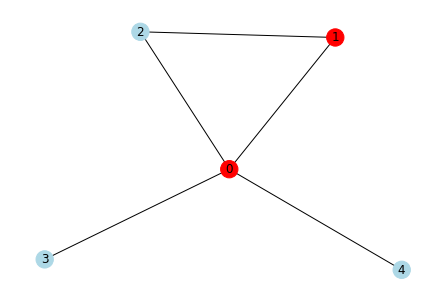

In [9]:
G = nx.Graph()
G.add_nodes_from(range(4))
G.add_edges_from([(1,2),(2,0),(0,3),(0,4),(0,1)])
nx.draw(G, nx.kamada_kawai_layout(G), with_labels=True, node_color=["red"]*2+["lightblue"]*(len(G)-2))

In [10]:
H = G.copy()
H.add_edge(0,1)

In [11]:
for order in [1,2]:
    eig = nx.eigenvector_centrality(G)
    eigv = [eig[i] for i in range(5)]
    before=(eigv/np.linalg.norm(eigv, ord=order))[0]
    eig = nx.eigenvector_centrality(H)
    eigv = [eig[i] for i in range(5)]
    after=(eigv/np.linalg.norm(eigv, ord=order))[0]
    print("Vertex 0 change in score (norm {}): {} -> {}".format(order, before, after))

Vertex 0 change in score (norm 1): 0.2991395061758901 -> 0.2991395061758901
Vertex 0 change in score (norm 2): 0.6358559007605201 -> 0.6358559007605201


# Eigenvector Centrality Small Rank Counterexample

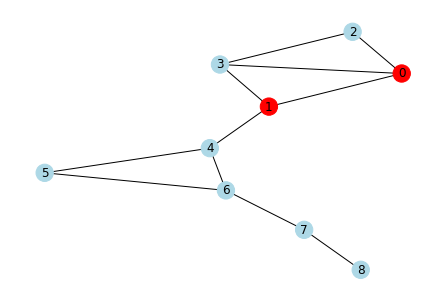

In [12]:
G = nx.Graph()
G.add_nodes_from(list(range(9)))
G.add_edges_from([(8,7),(7,6),(6,5),(6,4),(5,4),(4,1),(1,3),(3,0),(3,2),(0,2),(0,1)])
nx.draw(G, nx.kamada_kawai_layout(G), with_labels=True, node_color=["red"]*2+["lightblue"]*(len(G)-2))

In [13]:
H = G.copy()
H.add_edge(0,1)

In [14]:
for order in [1,2]:
    eig = nx.eigenvector_centrality(G)
    eigv = [eig[i] for i in range(9)]
    before3=(eigv/np.linalg.norm(eigv, ord=order))[3]
    before1=(eigv/np.linalg.norm(eigv, ord=order))[1]
    before0=(eigv/np.linalg.norm(eigv, ord=order))[0]
    eig = nx.eigenvector_centrality(H)
    eigv = [eig[i] for i in range(9)]
    after3=(eigv/np.linalg.norm(eigv, ord=order))[3]
    after1=(eigv/np.linalg.norm(eigv, ord=order))[1]
    after0=(eigv/np.linalg.norm(eigv, ord=order))[0]
    print("Vertex 0 change in score (norm {}): {} -> {}".format(order, before0, after0))
    print("Vertex 1 change in score (norm {}): {} -> {}".format(order, before1, after1))
    print("Vertex 3 change in score (norm {}): {} -> {}".format(order, before3, after3))

Vertex 0 change in score (norm 1): 0.17614186193716322 -> 0.17614186193716322
Vertex 1 change in score (norm 1): 0.1751283469837018 -> 0.1751283469837018
Vertex 3 change in score (norm 1): 0.17614186193716322 -> 0.17614186193716322
Vertex 0 change in score (norm 2): 0.4696097662746265 -> 0.4696097662746265
Vertex 1 change in score (norm 2): 0.46690764586340566 -> 0.46690764586340566
Vertex 3 change in score (norm 2): 0.4696097662746265 -> 0.4696097662746265


In [15]:
eig = nx.eigenvector_centrality(G)
eigv = [eig[i] for i in range(9)]
eign = eigv/np.linalg.norm(eigv, ord=1)
bef = [i for i in range(9) if eign[1]<eign[i]]
eig = nx.eigenvector_centrality(H)
eigv = [eig[i] for i in range(9)]
eign = eigv/np.linalg.norm(eigv, ord=1)
aft = [i for i in range(9) if eign[1]<eign[i]]
print(bef,aft)

[0, 3] [0, 3]


In [16]:
eign

array([0.17614186, 0.17512835, 0.1291592 , 0.17614186, 0.1253806 ,
       0.07839794, 0.08844899, 0.03746503, 0.01373617])